In [49]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, roc_auc_score,classification_report,roc_curve,auc
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import shap
shap.initjs()
import warnings
warnings.filterwarnings('ignore')
import os

In [50]:
train=pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Health%20Insurance%20Cross%20Sell%20Prediction%20%F0%9F%8F%A0%20%F0%9F%8F%A5/train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Health%20Insurance%20Cross%20Sell%20Prediction%20%F0%9F%8F%A0%20%F0%9F%8F%A5/test.csv')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [51]:
print(train.shape)
print(test.shape)

(381109, 12)
(127037, 11)


In [52]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [54]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

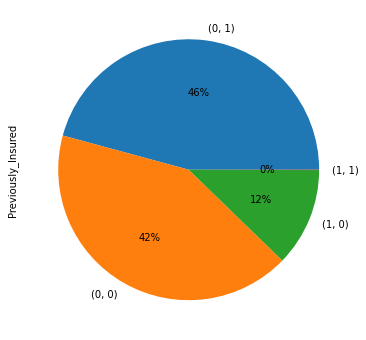

In [55]:
train=train.drop(columns='id',axis=1)
plt.figure(figsize=(12,6))
train.groupby(['Response'])['Previously_Insured'].value_counts().plot(
                                                 kind='pie',autopct='%.0f%%')
plt.show()

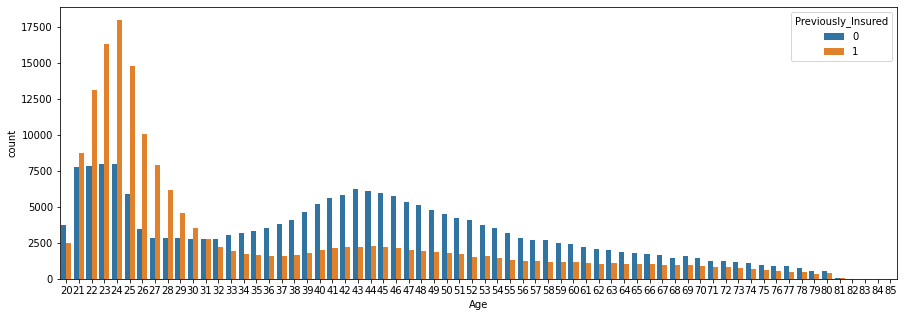

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(train.Age,hue=train.Previously_Insured)
plt.show()

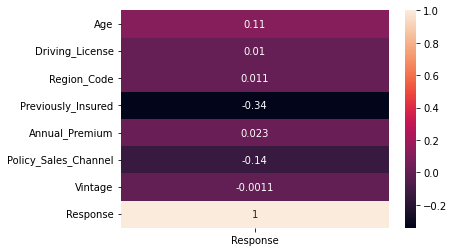

In [57]:
sns.heatmap(train.corr()[['Response']],annot=True,)
plt.show()

In [58]:
le = LabelEncoder()
le_count = 0

for col in train:
    if train[col].dtype == 'object':
        if len(list(train[col].unique())) <= 2:
            le.fit(train[col])
            train[col] = le.transform(train[col])
                      
            le_count += 1
            print('%d columns were label encoded.' % le_count)

1 columns were label encoded.
2 columns were label encoded.


In [59]:
train_dummies=pd.get_dummies(train)
x=train_dummies.drop(columns='Response',axis=1)
y=train_dummies['Response']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
clf = CatBoostClassifier(
    iterations=100, 
    learning_rate=0.001, 
    verbose=5,
)

clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
)

0:	learn: 0.6925568	test: 0.6925167	best: 0.6925167 (0)	total: 41ms	remaining: 4.06s
5:	learn: 0.6893403	test: 0.6893394	best: 0.6893394 (5)	total: 187ms	remaining: 2.92s
10:	learn: 0.6861869	test: 0.6861945	best: 0.6861945 (10)	total: 335ms	remaining: 2.71s
15:	learn: 0.6830509	test: 0.6830710	best: 0.6830710 (15)	total: 525ms	remaining: 2.76s
20:	learn: 0.6799553	test: 0.6799884	best: 0.6799884 (20)	total: 676ms	remaining: 2.54s
25:	learn: 0.6769148	test: 0.6769388	best: 0.6769388 (25)	total: 811ms	remaining: 2.31s
30:	learn: 0.6738427	test: 0.6739248	best: 0.6739248 (30)	total: 984ms	remaining: 2.19s
35:	learn: 0.6707945	test: 0.6709279	best: 0.6709279 (35)	total: 1.12s	remaining: 2s
40:	learn: 0.6678481	test: 0.6679621	best: 0.6679621 (40)	total: 1.27s	remaining: 1.82s
45:	learn: 0.6649456	test: 0.6650258	best: 0.6650258 (45)	total: 1.42s	remaining: 1.67s
50:	learn: 0.6619624	test: 0.6621168	best: 0.6621168 (50)	total: 1.56s	remaining: 1.5s
55:	learn: 0.6590960	test: 0.6592352	best

[[66813     0]
 [ 9409     0]]
0.8765579491485398


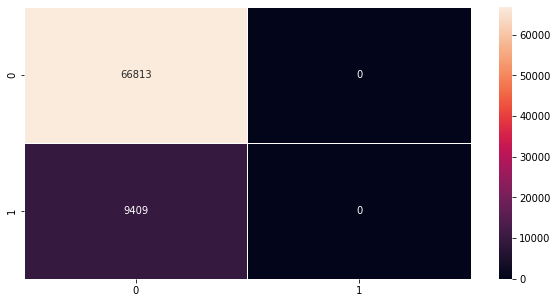

In [61]:
clf_pred=clf.predict(X_test)
cm = confusion_matrix(y_test, clf_pred)
print(cm)
print(accuracy_score(y_test, clf_pred))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)
plt.show()

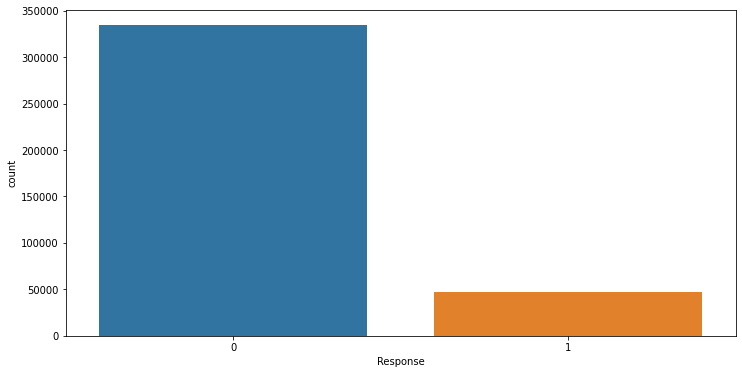

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(train.Response)
plt.show()

In [63]:
non_interested=train[train.Response==1]
interested=train[train.Response==0][:46710]
df=pd.concat([non_interested,interested])
data=df.sample(frac=1,random_state=42)
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
22472,1,25,1,15.0,0,< 1 Year,0,37394.0,152.0,125,0
1204,1,23,1,50.0,1,< 1 Year,0,28016.0,152.0,131,0
15105,0,27,1,28.0,0,< 1 Year,1,41264.0,154.0,119,0
205974,1,40,1,47.0,0,1-2 Year,1,38861.0,124.0,26,1
165747,0,66,1,28.0,0,1-2 Year,1,34215.0,26.0,29,1


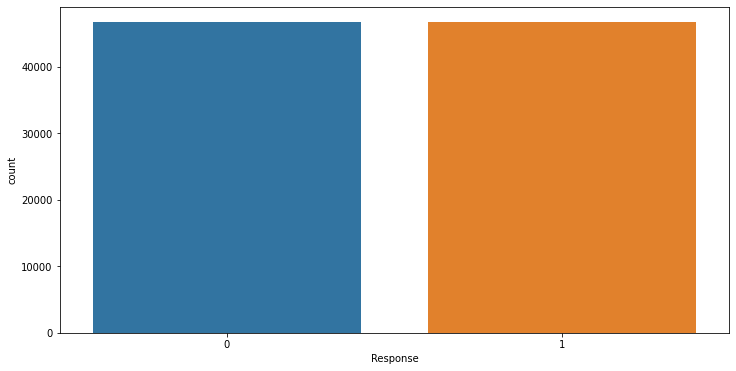

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(data.Response)
plt.show()

In [65]:
data1=pd.get_dummies(data)
x=data1.drop(columns='Response',axis=1)
y=data1['Response']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
clf = CatBoostClassifier(
    iterations=100, 
    learning_rate=0.001, 
    verbose=20,
)

clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
)

0:	learn: 0.6927284	test: 0.6927337	best: 0.6927337 (0)	total: 11.2ms	remaining: 1.11s
20:	learn: 0.6846546	test: 0.6846517	best: 0.6846517 (20)	total: 176ms	remaining: 661ms
40:	learn: 0.6768892	test: 0.6768834	best: 0.6768834 (40)	total: 331ms	remaining: 477ms
60:	learn: 0.6694123	test: 0.6694050	best: 0.6694050 (60)	total: 483ms	remaining: 309ms
80:	learn: 0.6622057	test: 0.6621990	best: 0.6621990 (80)	total: 641ms	remaining: 150ms
99:	learn: 0.6555749	test: 0.6555720	best: 0.6555720 (99)	total: 788ms	remaining: 0us

bestTest = 0.6555720487
bestIteration = 99



              precision    recall  f1-score   support

           0       0.90      0.67      0.77      9457
           1       0.73      0.92      0.82      9227

    accuracy                           0.79     18684
   macro avg       0.81      0.80      0.79     18684
weighted avg       0.82      0.79      0.79     18684

Accuracy 0.7934596446157139


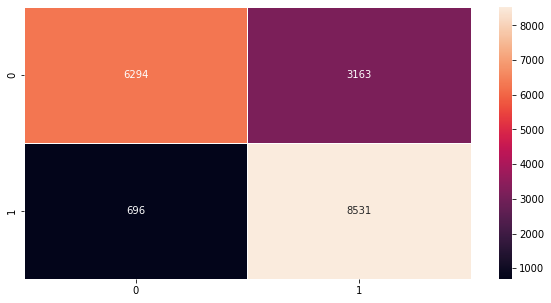

In [67]:
clf_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, clf_pred)
print(classification_report(y_test,clf_pred))
print('Accuracy',accuracy_score(y_test, clf_pred))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)
plt.show()

In [68]:
params = {
    'learning_rate': 0.005,
    "max_depth": 12,
    "num_leaves": 24,  
    "max_bin": 512,
    "num_iterations": 10000
}
model = lgb.LGBMClassifier(**params)
model.fit(X_train,y_train,
          eval_set=[(X_test, y_test)],
        early_stopping_rounds=1000)

[1]	valid_0's binary_logloss: 0.691051
[2]	valid_0's binary_logloss: 0.688932
[3]	valid_0's binary_logloss: 0.686835
[4]	valid_0's binary_logloss: 0.684758
[5]	valid_0's binary_logloss: 0.682702
[6]	valid_0's binary_logloss: 0.680663
[7]	valid_0's binary_logloss: 0.678644
[8]	valid_0's binary_logloss: 0.676644
[9]	valid_0's binary_logloss: 0.674665
[10]	valid_0's binary_logloss: 0.672704
[11]	valid_0's binary_logloss: 0.670763
[12]	valid_0's binary_logloss: 0.668841
[13]	valid_0's binary_logloss: 0.666938
[14]	valid_0's binary_logloss: 0.665058
[15]	valid_0's binary_logloss: 0.66319
[16]	valid_0's binary_logloss: 0.661344
[17]	valid_0's binary_logloss: 0.659512
[18]	valid_0's binary_logloss: 0.657697
[19]	valid_0's binary_logloss: 0.655901
[20]	valid_0's binary_logloss: 0.654121
[21]	valid_0's binary_logloss: 0.652362
[22]	valid_0's binary_logloss: 0.650616
[23]	valid_0's binary_logloss: 0.648885
[24]	valid_0's binary_logloss: 0.647177
[25]	valid_0's binary_logloss: 0.64548
[26]	valid_

LGBMClassifier(learning_rate=0.005, max_bin=512, max_depth=12,
               num_iterations=10000, num_leaves=24)

100%|===================| 18683/18684 [21:26<00:00]        

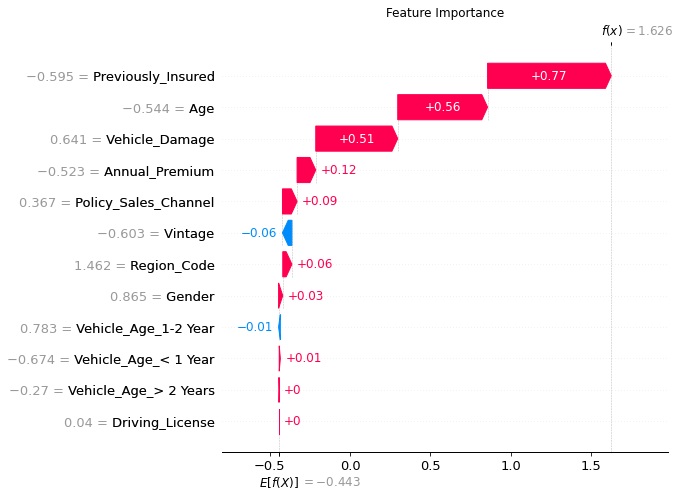

In [71]:
explainer = shap.Explainer(model, X_train,feature_names=x.columns.values.tolist())
shap_values = explainer(X_test)
plt.title('Feature Importance')
shap.plots.waterfall(shap_values[0],max_display=12)

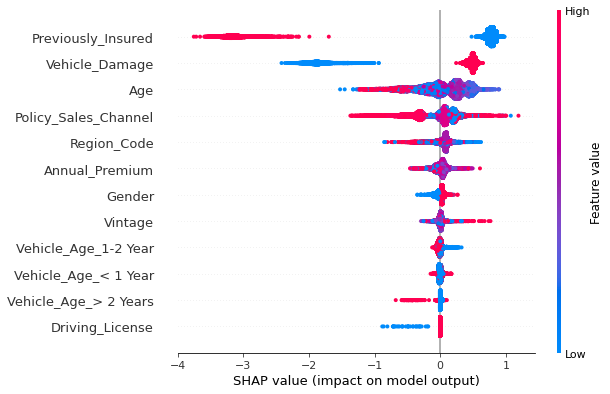

In [72]:
shap.plots.beeswarm(shap_values,max_display=12)